In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import hamming
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [2]:
names = ['NC_004718.3:26117-26347 SARS coronavirus Tor2, envelope protein',
        'NC_045512.2:26245-26472 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, envelope protein',
        'NC_019843.3:27590-27838 Middle East respiratory syndrome-related coronavirus isolate HCoV-EMC/2012, envelope protein',
        'NC_009020.1:27903-28151 Pipistrellus bat coronavirus HKU5, envelope protein',
        'NC_003045.1:28422-28676 Bovine coronavirus isolate BCoV-ENT, envelope protein',
        'NC_009019.1:27737-27985 Tylonycteris bat coronavirus HKU4, envelope protein',
        'NC_001846.1:28706-28957 Murine hepatitis virus strain MHV-A59 C12 mutant, envelope protein',
        'NC_038294.1:27589-27837 Betacoronavirus England 1 isolate H123990006, envelope protein',
        'NC_005831.2:25200-25433 Human Coronavirus NL63, envelope protein',
        'NC_039207.1:27579-27827 Betacoronavirus Erinaceus/VMC/DEU/2012 isolate ErinaceusCoV/2012-174/GER/2012, envelope protein']

In [3]:
sequences = ['ATGTACTCATTCGTTTCGGAAGAAACAGGTACGTTAATAGTTAATAGCGTACTTCTTTTTCTTGCTTTCGTGGTATTCTTGCTAGTCACACTAGCCATCCTTACTGCGCTTCGATTGTGTGCGTACTGCTGCAATATTGTTAACGTGAGTTTAGTAAAACCAACGGTTTACGTCTACTCGCGTGTTAAAAATCTGAACTCTTCTGAAGGAGTTCCTGATCTTCTGGTCTAA',
          'ATGTACTCATTCGTTTCGGAAGAGACAGGTACGTTAATAGTTAATAGCGTACTTCTTTTTCTTGCTTTCGTGGTATTCTTGCTAGTTACACTAGCCATCCTTACTGCGCTTCGATTGTGTGCGTACTGCTGCAATATTGTTAACGTGAGTCTTGTAAAACCTTCTTTTTACGTTTACTCTCGTGTTAAAAATCTGAATTCTTCTAGAGTTCCTGATCTTCTGGTCTAA',
         'ATGTTACCCTTTGTCCAAGAACGAATAGGGTTGTTCATAGTAAACTTTTTCATTTTTACCGTAGTATGTGCTATAACACTCTTGGTGTGTATGGCTTTCCTTACGGCTACTAGATTATGTGTGCAATGTATGACAGGCTTCAATACCCTGTTAGTTCAGCCCGCATTATACTTGTATAATACTGGACGTTCAGTCTATGTAAAATTCCAGGATAGTAAACCCCCTCTACCACCTGACGAGTGGGTTTAA',
         'ATGTTACCTTTTGTCCAAGAACAAATAGGTGCATTCATAGTAAATTTTTTCATATTATCCGTAGTTTGTGCTGTAACACTCGTTGTGTGTCTAGCAATCCTTACGGCTATTCGATTATGTGTGCAGTGTGTTTCTGGTTGTCATACATTAGTATTTCTACCAGCTGTTCATATTTATAATACAGGGCGTGCAGCCTATGTAAAGTTCCAAGAGAGCCATCCACCCTATCCCCCTGAGGACTGGGTTTAA',
         'ATGTTTATGGCTGATGCTTATTTTGCAGACACTGTGTGGTATGTGGGGCAAATAATTTTTATAGTTGCCATTTGTTTATTGGTTATAATAGTTGTAGTGGCATTTTTGGCAACTTTTAAATTGTGTATTCAACTTTGCGGTATGTGTAATACCTTAGTACTGTCCCCTTCTATTTATGTGTTTAATAGAGGTAGGCAGTTTTATGAGTTTTACAATGATGTAAAACCACCAGTTCTTGATGTGGATGACGTTTAG',
         'ATGTTACCTTTTGTCCATGAACAAATAGGTACTATCATAGTAAATTTTTTCATTTTAACCGTAGTATGCGCTATTACATTAGTGGTGTGTTTAGCAATCCTTACGGCTATTAGATTATGTGTGCAATGTGCTTCGGGTGTTAACACTCTTTTGTTTGTACCCGCGTTCTACATCTATAATACTGGGCGCAACGCCTATTTTAAGTTTCAAGAGAATCGTCCACCCTTTCCTCCTGAGGACTGGGTTTAA',
         'ATGTTTAATTTATTCCTTACAGACACAGTATGGTATGTGGGGCAGATTATTTTTATATTCGCAGTGTGTTTGATGGTCACCATAATTGTGGTTGCCTTCCTTGCGTCTATCAAACTTTGTATTCAACTTTGCGGTTTATGTAATACTTTGGTGCTGTCCCCTTCTATTTATTTGTATGATAGGAGTAAGCAGCTTTATAAGTATTATAATGAAGAAATGAGACTGCCCCTATTAGAGGTGGATGATATCTAA',
         'ATGTTACCCTTTGTCCAAGAACGAATAGGGTTGTTCATAGTAAACTTTTTCATTTTTACCGTAGTATGTGCTATAACACTCTTGGTGTGTATGGCTTTCCTTACGGCTACTAGATTATGTGTGCAATGTATGACAGGCTTCAATACCCTGTTAGTTCAGCCCGCATTATACTTGTATAATACTGGACGTTCAGTCTATGTAAAATTCCAGGATAGTAAACCCCCTCTACCACCTGACGAGTGGGTTTAA',
         'ATGTTCCTTCGATTAATTGATGACAATGGTATTGTCCTCAATTCCATTTTATGGCTCCTTGTTATGATATTTTTCTTTGTGTTGGCAATGACCTTTATTAAACTGATTCAATTGTGTTTTACTTGTCATTATTTTTTTAGTAGGACATTATATCAACCAGTTTATAAAATTTTTCTTGCTTACCAAGATTATATGCAAATAGCACCTGTTCCAGCTGAAGTACTAAATGTCTAA',
         'ATGTTACCTTTTGTCCATCAACAATTAGGGTCATTCATAGTTAACTTTTTCATCTTTACCGTAGCTTGCGCTGTAATACTTTTAGTATCTATGGCAATCCTTACGGCCTGTCGATTATGTGTGCAGTGCTTAACAGGTGTTAATACCTTGTTAGTTCAACCAGCCATATATGTTTATAACATGGGACATTCTGTCTATGTAAAGTATCAGAATAGTAAACCAGAACTGCCGCCAGCAGATTGGTTTTAA',
         ]

In [4]:
maxm = max(len(x) for x in sequences)
maxm

255

In [5]:
for i in range(len(sequences)):
    sequences[i] = sequences[i].ljust(maxm)

In [6]:
n = len(sequences)
dist_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        # Hamming distance between strings - divides by length too
        dist_matrix[i, j] = hamming(list(sequences[i]), list(sequences[j]))

df = pd.DataFrame(dist_matrix, index=names, columns=names)
df.to_csv('Ndistance.txt')

Text(0.5, 1.0, 'Distance Matrix visualised')

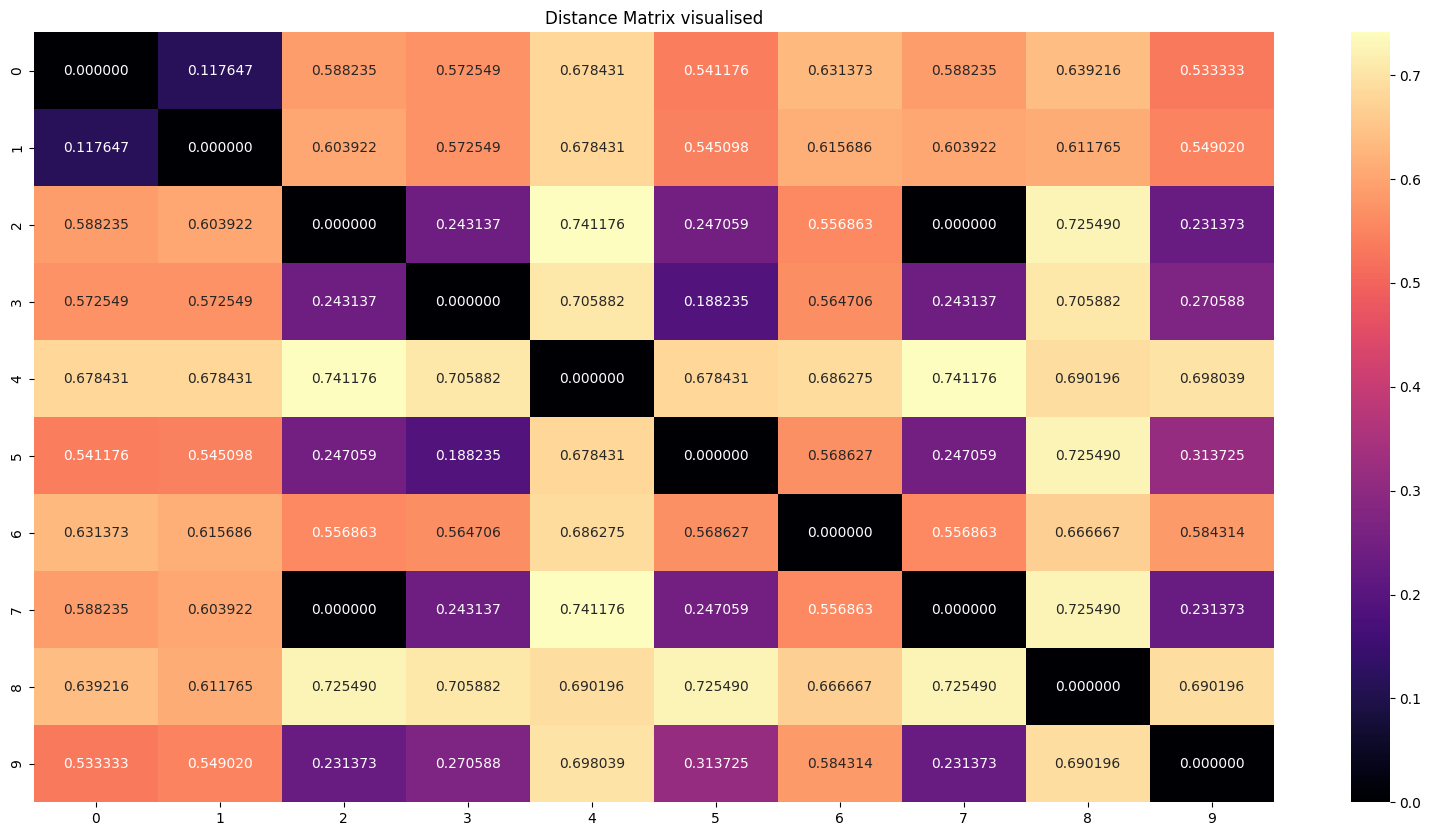

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(dist_matrix, annot=True, cmap='magma',fmt='f')
plt.title('Distance Matrix visualised')

### Analysis on this heatmap(visual representation of the distance matrix):

We notice that apart from the diagonal of the matrix, two squares, (2,7) and (7,2) are also 0. The reason their distance = 0 is because of the fact that they have duplicate genome sequences. We also take cognisance of the pairs which are rather close, like (NC_004718, NC_005831) or (0,1) pairs. We expect these to vbe rather close in the phylogenetic tree. We also notice the highest distance values like (7,8), or (NC_038294.1,NC_005831.2), and expect them to be rather far apart in the phylogenetic tree that we create

Text(0.5, 0, 'Distancevalues')

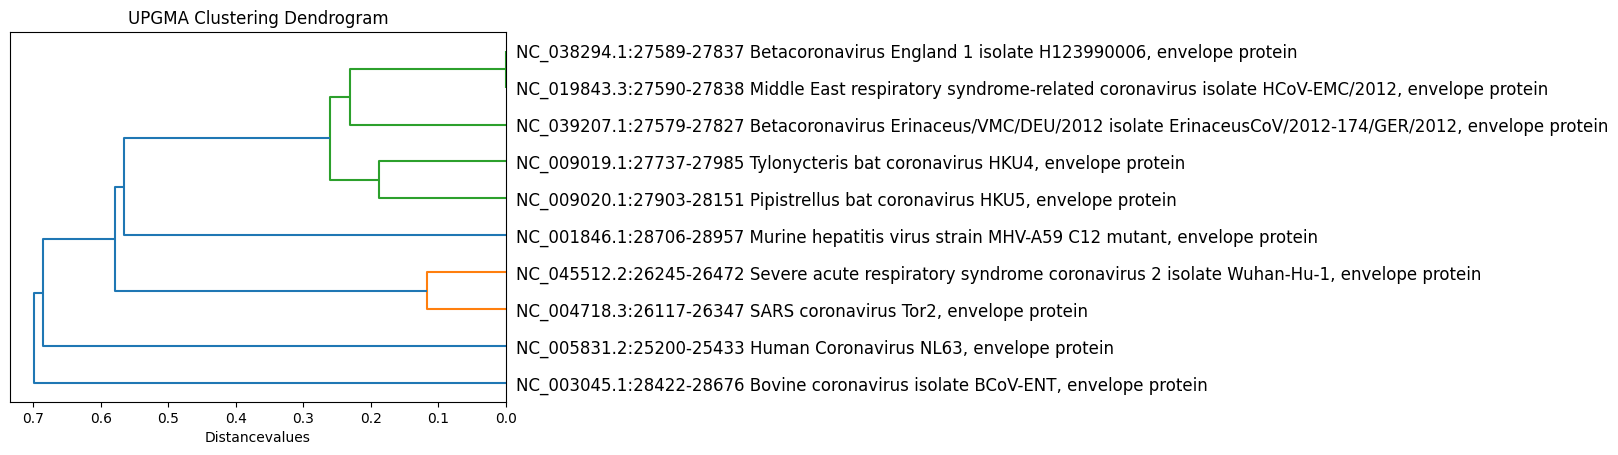

In [8]:
condensed_dist_matrix = dist_matrix[np.triu_indices(len(dist_matrix), k=1)]

# Perform UPGMA clustering using 'average' linkage
linkage_matrix = linkage(condensed_dist_matrix, method='average')

phylo = dendrogram(linkage_matrix, labels=names,orientation = 'left')
plt.title('UPGMA Clustering Dendrogram')
plt.xlabel('Distancevalues')

In [9]:
labels_in_order = phylo['ivl']
markdown_content = f"""
### Analysis on the phylogenetic tree created:

As expected, the first two in this tree, namely {labels_in_order[0],labels_in_order[1]} have ~0 distance, and their relationship in the phylogenetic tree can hardly be seen.   
All of our expectations of smallest differences, such as those in {labels_in_order[7],labels_in_order[8]} have been proved by their close relationship in the tree.   
Similarly, the maximum differences have also been similar to our expectations.   
Hence, the tree relationship that we have gotten seems to be consistent with our expectations, and our clustering has been done properly.
We also note that the phylogenetic tree that we have gotten is not just any tree, but rather a dendogram, where the length denotes the value of the two species in the distance matrix
Thus their linking is such chosen that the information of the distance matrix is there in it.     
    

We also notice the reason behind the naming of the SARS-COV-2 or the Covid-19 virus, because of its close relationship with the SARS coronavirus Tor2, as disucssed in the lecture.  
The relationships between the coronavirus strands helped us identify a lot about what methodologies can apply to its study, and also to understand what testing techniques might be effective against it.

""" 
display(Markdown(markdown_content))


### Analysis on the phylogenetic tree created:

As expected, the first two in this tree, namely ('NC_003045.1:28422-28676 Bovine coronavirus isolate BCoV-ENT, envelope protein', 'NC_005831.2:25200-25433 Human Coronavirus NL63, envelope protein') have ~0 distance, and their relationship in the phylogenetic tree can hardly be seen.   
All of our expectations of smallest differences, such as those in ('NC_039207.1:27579-27827 Betacoronavirus Erinaceus/VMC/DEU/2012 isolate ErinaceusCoV/2012-174/GER/2012, envelope protein', 'NC_019843.3:27590-27838 Middle East respiratory syndrome-related coronavirus isolate HCoV-EMC/2012, envelope protein') have been proved by their close relationship in the tree.   
Similarly, the maximum differences have also been similar to our expectations.   
Hence, the tree relationship that we have gotten seems to be consistent with our expectations, and our clustering has been done properly.
We also note that the phylogenetic tree that we have gotten is not just any tree, but rather a dendogram, where the length denotes the value of the two species in the distance matrix
Thus their linking is such chosen that the information of the distance matrix is there in it.     
    

We also notice the reason behind the naming of the SARS-COV-2 or the Covid-19 virus, because of its close relationship with the SARS coronavirus Tor2, as disucssed in the lecture.  
The relationships between the coronavirus strands helped us identify a lot about what methodologies can apply to its study, and also to understand what testing techniques might be effective against it.

